# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:**  Muhammad Ario Winaya
- **Email:** muhammad21121@mail.unpad.ac.id
- **ID Dicoding:** muhammad_ario_winaya

## Menentukan Pertanyaan Bisnis

- Negara mana dengan total pembelian tertinggi?
- Bagaimana tren pembelian pada aplikasi dari tahun 2016 - 2018?
- Bagaimana performa penjual berdasarkan jumlah pesanan dan total penjualan?

## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [81]:
#Import dataset
customers = pd.read_csv('/content/drive/MyDrive/Data Brazil eccomers customer/olist_customers_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Data Brazil eccomers customer/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/Data Brazil eccomers customer/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Data Brazil eccomers customer/olist_orders_dataset.csv')

In [82]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [83]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [84]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [85]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [86]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


### Assessing Data

Memeriksa Info data

In [87]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [88]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [89]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [90]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Memeriksa Duplikat Data

In [91]:
print("Jumlah duplikasi: ",customers.duplicated().sum())

Jumlah duplikasi:  0


In [92]:
print("Jumlah duplikasi: ",order_items.duplicated().sum())

Jumlah duplikasi:  0


In [93]:
print("Jumlah duplikasi: ",order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [94]:
print("Jumlah duplikasi: ",orders.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa Deskripsi Data

In [95]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [96]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [97]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [98]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Cleaning Data

In [99]:
#Menghapus kolom yang mengandung missing value dan tidak digunakan dalam dataset
order_reviews = order_reviews.drop((['review_comment_title','review_comment_message']), axis=1)
orders = orders.drop("order_approved_at", axis=1)

In [100]:
#Menghapus missing value yang tersisa
orders = orders.dropna()

In [101]:
# Mengubah format data tanggal
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

<ipython-input-101-4299e46cd1a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
<ipython-input-101-4299e46cd1a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
<ipython-input-101-4299e46cd1a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

## Exploratory Data Analysis (EDA)

### Explore ...

EDA customers data

<ipython-input-102-e80e76b87a6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='rainbow')


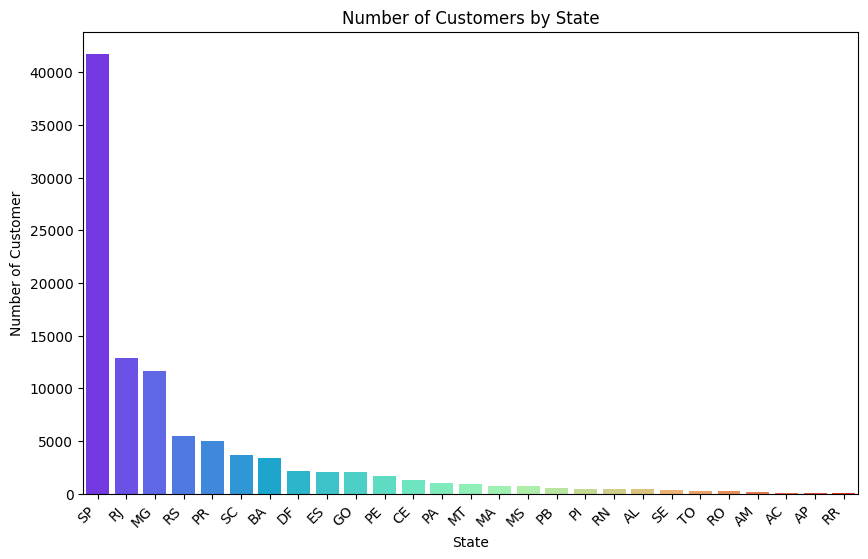

In [102]:
# Number of Customers by State
plt.figure(figsize=(10, 6))
state_counts = customers['customer_state'].value_counts().sort_values(ascending=False)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='rainbow')
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
Number_of_Customer = customers['customer_id'].nunique()
print("Number of Customer :", Number_of_Customer)

Number of Customer : 99441


EDA order items data

In [104]:
Number_of_Seller = order_items['seller_id'].nunique()
print("Number of Seller :", Number_of_Seller)

Number of Seller : 3095


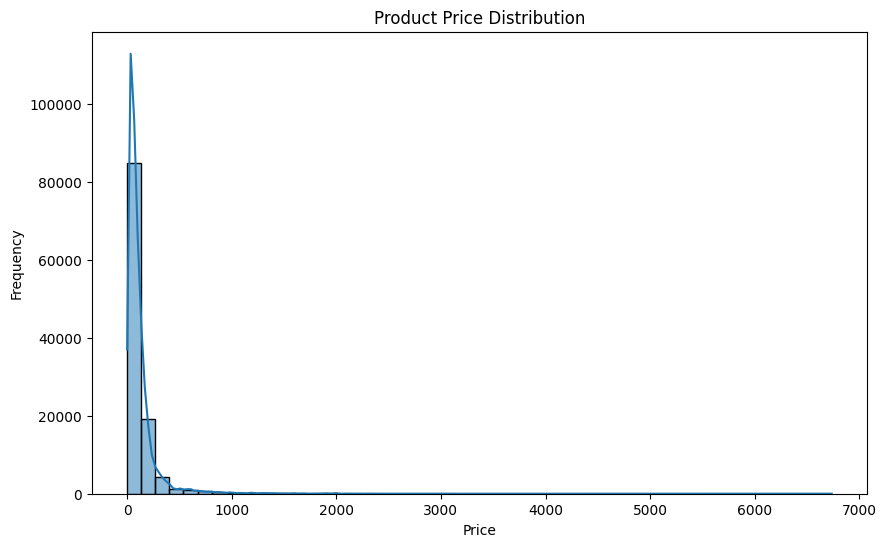

In [105]:
# Product Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

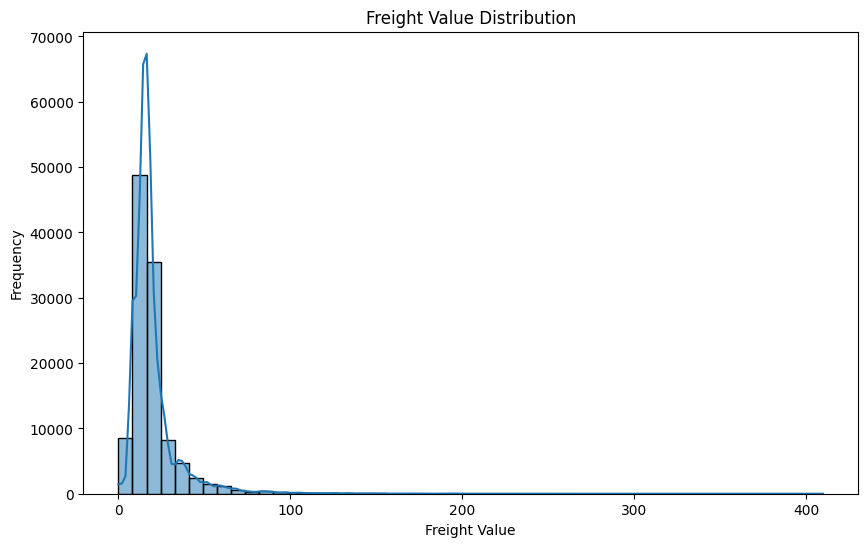

In [106]:
# Freight Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(order_items['freight_value'], bins=50, kde=True)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

In [107]:
# Correlation of Price and freight value
Correlation = order_items[['price', 'freight_value']].corr()
print(Correlation)

                  price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000


EDA order reviews data

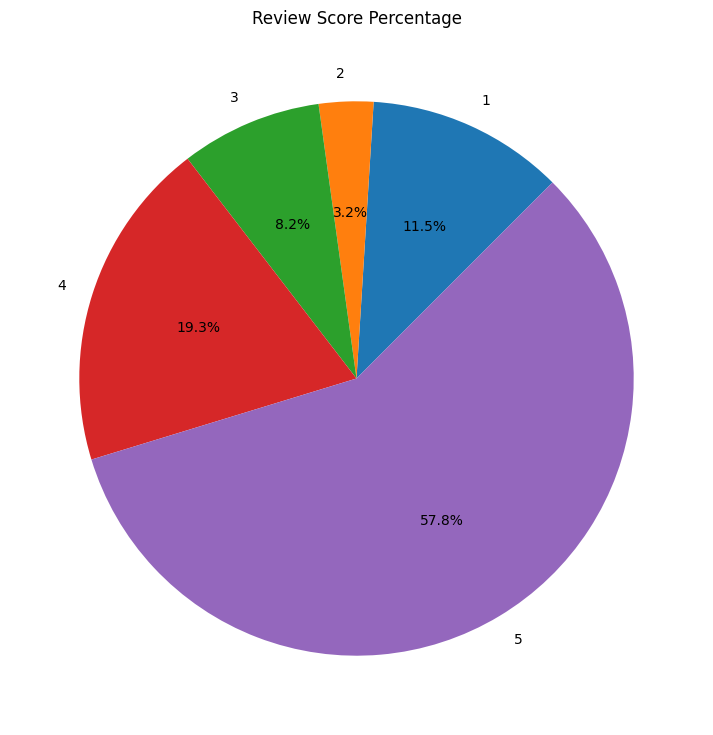

In [108]:
# Review Score Percentage
score_counts = order_reviews['review_score'].value_counts()
score_counts = score_counts.sort_index()
plt.figure(figsize=(9,9))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle= 45)
plt.title('Review Score Percentage')
plt.show()

EDA orders data

In [109]:
# Menghitung lama waktu pengiriman dalam jumlah hari
orders['delivery time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [110]:
# Menentukan Status Pengiriman (On time/Late)
orders['delivery_status'] = orders.apply(lambda row: 'On time' if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else 'Late', axis=1)

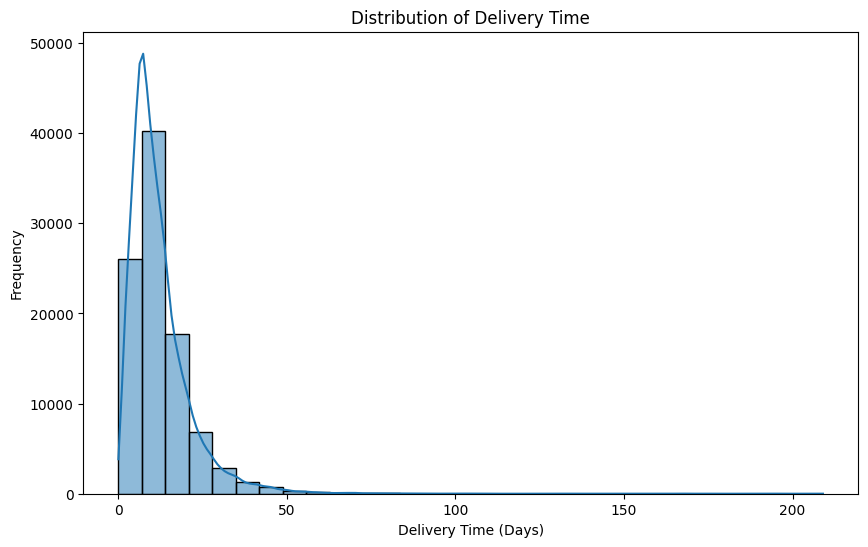

In [111]:
# Distribution of Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(orders['delivery time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()


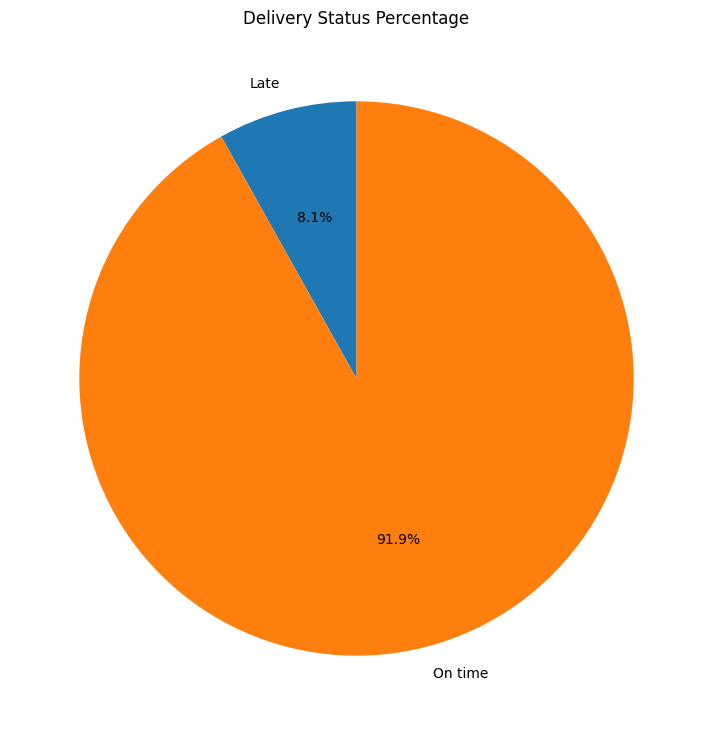

In [112]:
# Menghitung Persentase Status Pengiriman
score_counts = orders['delivery_status'].value_counts()
score_counts = score_counts.sort_index()
plt.figure(figsize=(9,9))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle= 90)
plt.title('Delivery Status Percentage')
plt.show()

Menggabungkan Seluruh Dataset

In [113]:
#Merge Data
merge_1 = pd.merge(left=order_items, right=orders, how="inner", left_on="order_id", right_on="order_id")
merge_2 = pd.merge(left=merge_1, right=order_reviews, how="inner", left_on="order_id", right_on="order_id")
full_df = pd.merge(left=merge_2, right=customers, how="inner", left_on="customer_id", right_on="customer_id")

In [114]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110011 entries, 0 to 110010
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110011 non-null  object        
 1   order_item_id                  110011 non-null  int64         
 2   product_id                     110011 non-null  object        
 3   seller_id                      110011 non-null  object        
 4   shipping_limit_date            110011 non-null  object        
 5   price                          110011 non-null  float64       
 6   freight_value                  110011 non-null  float64       
 7   customer_id                    110011 non-null  object        
 8   order_status                   110011 non-null  object        
 9   order_purchase_timestamp       110011 non-null  datetime64[ns]
 10  order_delivered_carrier_date   110011 non-null  object        
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pembelian pada aplikasi dari tahun 2016 - 2018?


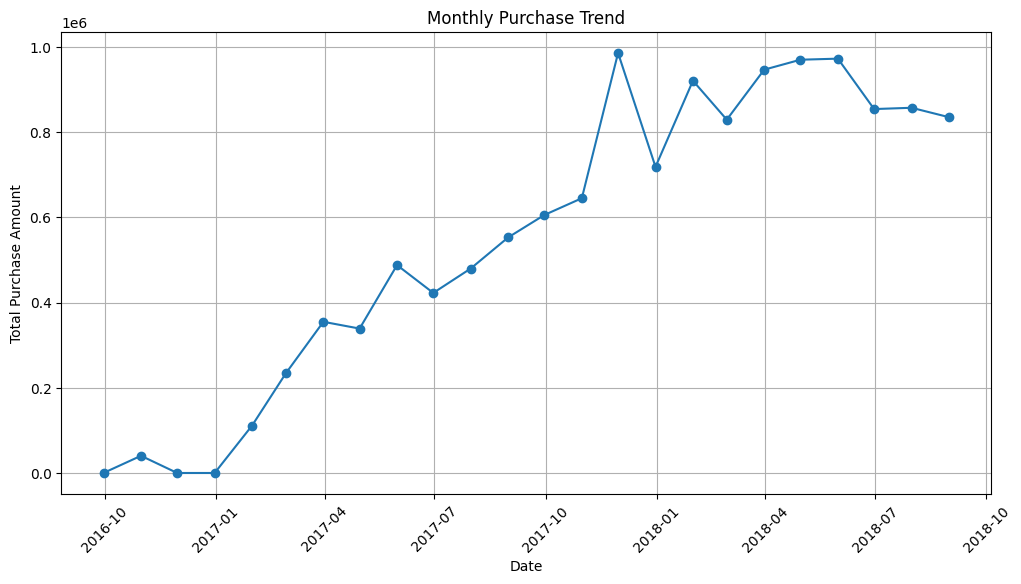

In [116]:
full_df['order_purchase_timestamp'] = pd.to_datetime(full_df['order_purchase_timestamp'])
monthly_purchase = full_df.resample('M', on='order_purchase_timestamp')['price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase.index, monthly_purchase.values, marker='o', linestyle='-')
plt.title('Monthly Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 2: Negara mana dengan total pembelian tertinggi?

<ipython-input-117-d5633ac526f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_states.index, y=sorted_states.values, palette='viridis')


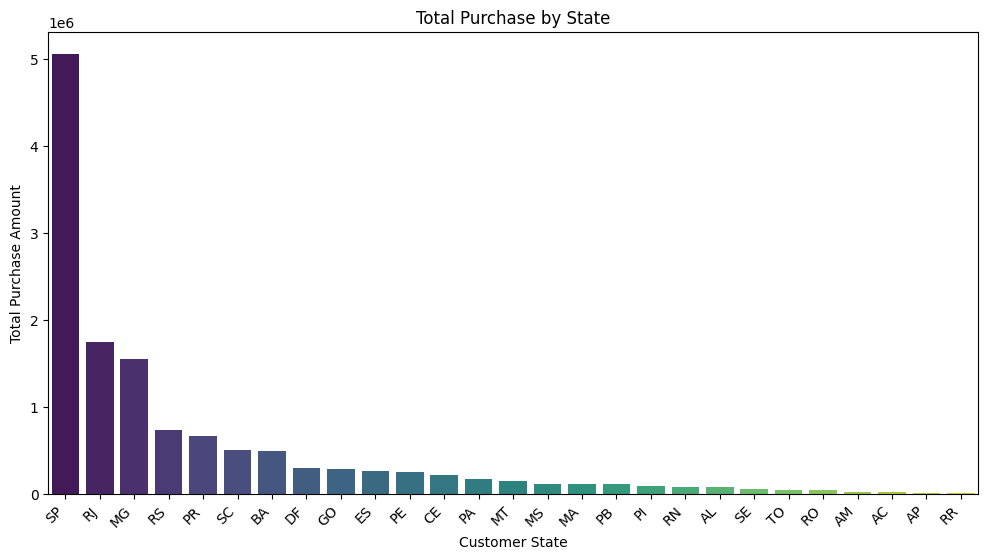

In [117]:
total_purchase_by_state = full_df.groupby('customer_state')['price'].sum()
sorted_states = total_purchase_by_state.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_states.index, y=sorted_states.values, palette='viridis')
plt.title('Total Purchase by State')
plt.xlabel('Customer State')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


### Pertanyaan 3: Bagaimana performa penjual berdasarkan jumlah pesanan dan total penjualan?

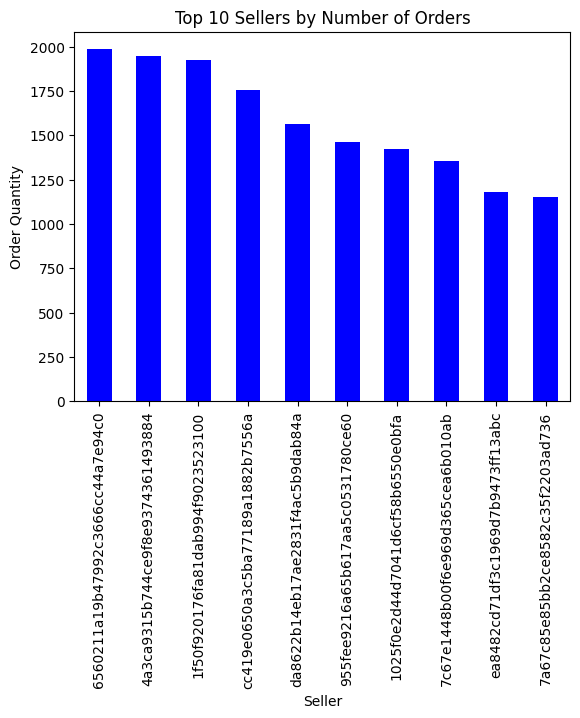

In [118]:
seller_performance = full_df.groupby(['seller_id']).agg({'order_id': 'count', 'price': 'sum'})
seller_performance.sort_values(by='order_id', ascending=False, inplace=True)
seller_performance.head(10).plot(kind='bar', y='order_id', secondary_y='price', color='blue', legend=False)
plt.ylabel('Order Quantity')
plt.xlabel('Seller')
plt.title('Top 10 Sellers by Number of Orders')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan grafik tersebut dapat dilihat bahwa tren pembelian pada aplikasi E-Commerce cenderung meningkat dari tahun 2016-2018, namun mengalami beberapa fluktuasi pada titik waktu tertentu. Terlihat juga adanya pola musiman di mana harga cenderung meningkat di awal tahun

- Conclution pertanyaan 2 : Berdasarkan grafik tersebut dapat dilihat bahwa negara bagian dengan total pembelian tertinggi berdasarkan harga berasal dari negara bagian Sao Paulo (SP) dengan tingkat pembelian di atas 5.000.000, diikuti oleh Rio de Janeiro (RJ), dan Minas Gerais (MG) dengan tingkat pembelian lebih dari 1.500.000 . Di sisi lain, Roraima (RR), Amapa (AP), dan Acre (AC) adalah negara bagian dengan tingkat pembelian terendah dengan angka di bawah 20.000

- Conclution pertanyaan 3 : Berdasarkan grafik tersebut dapat dilihat bahwa 10 seller dengan order quantity tertinggi memiliki tingkat jumlah pesanan di atas 1000 dalam rentang waktu 2 tahun